# MNIST Classifiers Demo

This notebook demonstrates the use of three different classifiers for the MNIST dataset:
1. Random Forest
2. Feed-Forward Neural Network
3. Convolutional Neural Network

## Setup and Data Loading

In [ ]:
import numpy as np
from abc import ABC, abstractmethod

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.datasets import mnist

In [37]:
mnist.load_data()

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [38]:
class MnistClassifierInterface(ABC):
    @abstractmethod
    def train(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        pass
    
    @abstractmethod
    def predict(self, X: np.ndarray) -> np.ndarray:
        pass

In [39]:
class RandomForestMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        
    def train(self, x_train, y_train):
        X_train_flat = x_train.reshape(x_train.shape[0], -1)
            
        return self.model.fit(X_train_flat, y_train)
    
    def predict(self, x_val):
        X_val_flat = x_val.reshape(x_val.shape[0], -1)

        return self.model.predict(X_val_flat)

In [40]:
class NeuralNetworkMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Flatten(input_shape=(28, 28, 1)),
            Dense(128, activation='relu'),
            Dropout(0.2),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(10, activation='softmax')
        ])
        
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, x_train, y_train):
        return self.model.fit(x_train, y_train, epochs=10, batch_size=32)
    
    def predict(self, x_val):
        return np.argmax(self.model.predict(x_val), axis=-1)

In [41]:
class CNNMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])
        
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, x_train, y_train):
        return self.model.fit(x_train, y_train, epochs=10, batch_size=32)
    
    def predict(self, x_val):
        return np.argmax(self.model.predict(x_val), axis=-1)

In [42]:
class MnistClassifier:    
    def __init__(self, algorithm='rf'):

        self.algorithm = algorithm.lower()
        
        if self.algorithm == 'rf':
            self.classifier = RandomForestMnistClassifier()
        elif self.algorithm == 'nn':
            self.classifier = NeuralNetworkMnistClassifier()
        elif self.algorithm == 'cnn':
            self.classifier = CNNMnistClassifier()
        else:
            raise ValueError("Invalid algorithm. Choose from: 'rf', 'nn', or 'cnn'.")
        
    def train(self, X_train, y_train):
        self.classifier.train(X_train, y_train)
        
    def predict(self, X):
        return self.classifier.predict(X)

## Visualize Some Examples

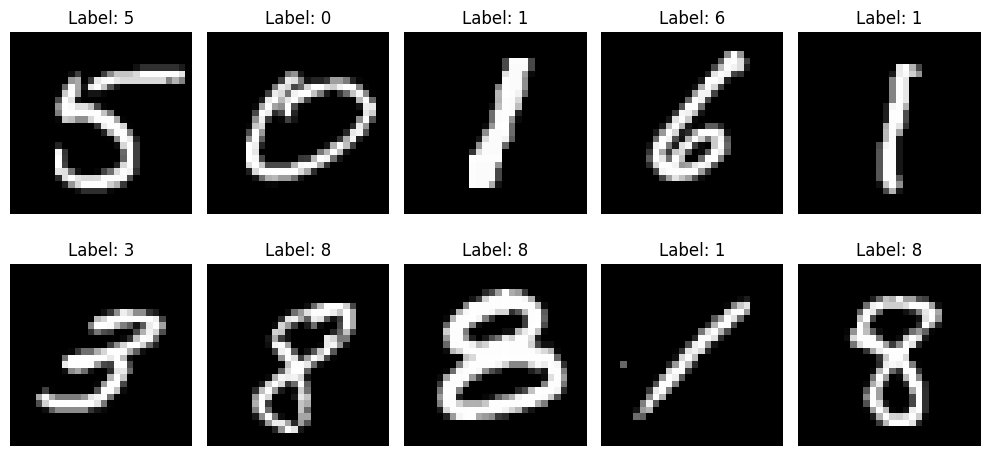

In [43]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 1. Random Forest Classifier

In [44]:
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_val_flat = x_val.reshape(x_val.shape[0], -1)

rf_classifier = MnistClassifier(algorithm='rf')

rf_classifier.train(X_train_flat, y_train)

y_val_pred_rf = rf_classifier.predict(X_val_flat)

In [45]:
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest validation accuracy: {rf_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf))

Random Forest validation accuracy: 0.9688

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1175
           1       0.98      0.99      0.98      1322
           2       0.95      0.98      0.97      1174
           3       0.96      0.95      0.96      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.96      0.96      1104
           6       0.98      0.99      0.98      1177
           7       0.97      0.96      0.97      1299
           8       0.96      0.96      0.96      1160
           9       0.96      0.95      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



## 2. Neural Network Classifier

In [47]:
nn_classifier = MnistClassifier(algorithm='nn')

nn_classifier.train(x_train, y_train)

y_val_pred_nn = nn_classifier.predict(x_val)

Epoch 1/10


/Users/denisbodnar/.pyenv/versions/3.10.16/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - accuracy: 0.8105 - loss: 0.6141
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.9457 - loss: 0.1840
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 0.9581 - loss: 0.1419
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.9655 - loss: 0.1123
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9705 - loss: 0.0975
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9713 - loss: 0.0886
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.9753 - loss: 0.0798
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.9787 - loss: 0.0676
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9799 - loss: 0.0636
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9808 - loss: 0.0611
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step


In [48]:

nn_accuracy = accuracy_score(y_val, y_val_pred_nn)
print(f"Neural Network validation accuracy: {nn_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_nn))

Neural Network validation accuracy: 0.9772

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.97      0.97      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.98      0.99      0.98      1177
           7       0.98      0.98      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.98      0.96      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



## 3. Convolutional Neural Network Classifier

In [50]:
cnn_classifier = MnistClassifier(algorithm='cnn')

cnn_classifier.train(x_train, y_train)

y_val_pred_cnn = cnn_classifier.predict(x_val)

Epoch 1/10


/Users/denisbodnar/.pyenv/versions/3.10.16/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9019 - loss: 0.3233
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9859 - loss: 0.0451
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9902 - loss: 0.0294
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9936 - loss: 0.0194
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9952 - loss: 0.0149
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9956 - loss: 0.0134
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9970 - loss: 0.0096
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9969 - loss: 0.0087
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9979 - loss: 0.0063
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9986 - loss: 0.0051
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [51]:

cnn_accuracy = accuracy_score(y_val, y_val_pred_cnn)
print(f"Neural Network validation accuracy: {cnn_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_cnn))

Neural Network validation accuracy: 0.9891

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       1.00      1.00      1.00      1322
           2       0.98      0.99      0.99      1174
           3       1.00      0.97      0.98      1219
           4       0.99      0.99      0.99      1176
           5       0.98      0.99      0.98      1104
           6       0.98      1.00      0.99      1177
           7       0.99      0.99      0.99      1299
           8       0.99      0.98      0.99      1160
           9       0.98      0.99      0.99      1194

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



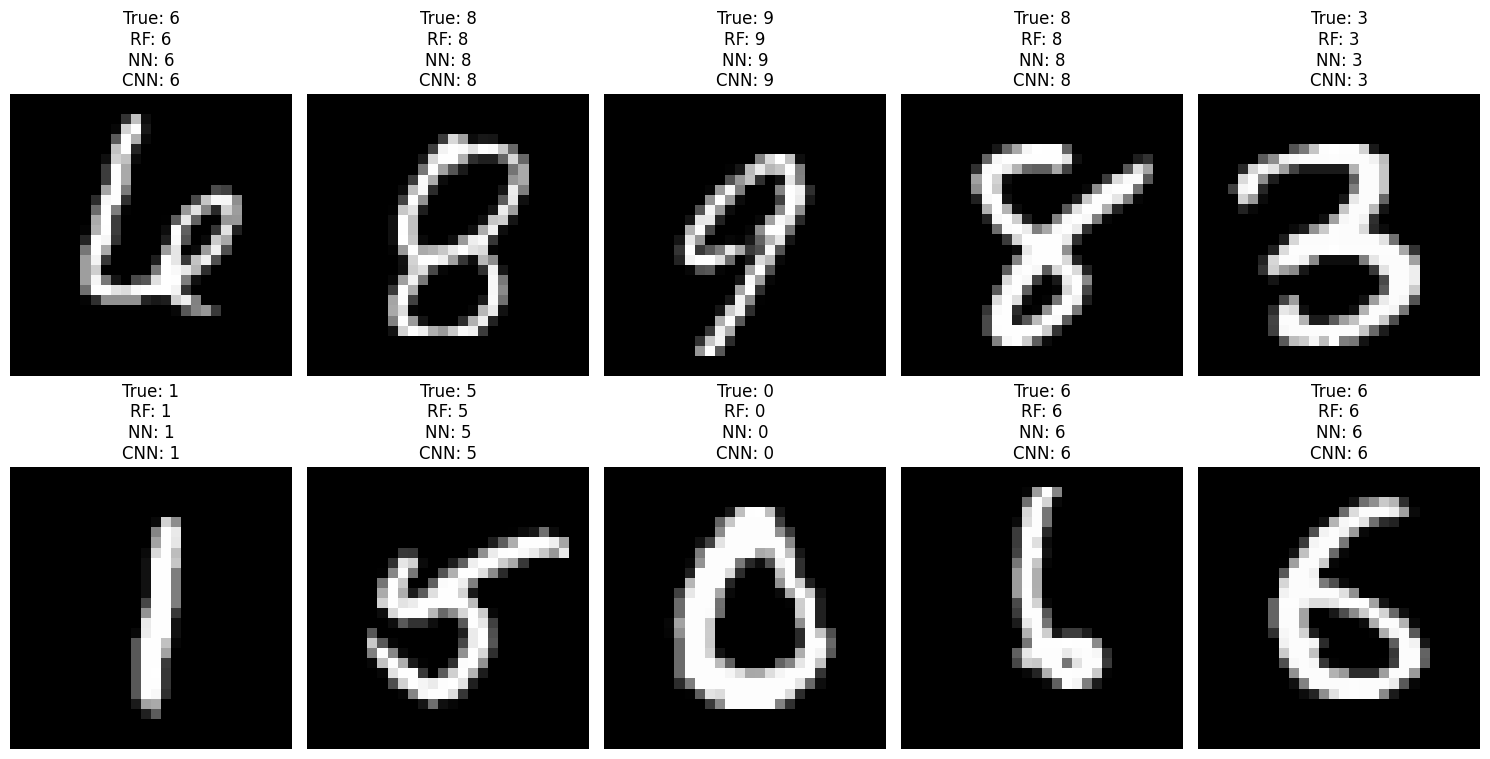

In [53]:
n_examples = 10
example_indices = np.random.choice(len(x_val), n_examples, replace=False)

example_images = x_val[example_indices]
true_labels = y_val[example_indices]

rf_predictions = y_val_pred_rf[example_indices]
cnn_predictions = y_val_pred_cnn[example_indices]
nn_predictions = y_val_pred_nn[example_indices]

plt.figure(figsize=(15, 8))
for i in range(n_examples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(example_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}\nRF: {rf_predictions[i]}\nNN: {nn_predictions[i]}\nCNN: {cnn_predictions[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()